In [62]:
import pandas as pd
import numpy as np
import re

In [63]:
# df1 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/salt_lake_raw.csv')
# df2 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/park_city_raw.csv')

# df = pd.concat([df1, df2]).drop(columns=['Unnamed: 0']).reset_index()
# df.groupby('URL').size().value_counts()

1    899
2     19
dtype: int64

In [64]:
df1 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/chicago_il.csv')
df2 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/evanston_il.csv')
df3 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/glenview_il.csv')
df4 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/naperville_il.csv')
df5 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/oak_park_il.csv')
df6 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/skokie_il.csv')
df7 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/cicero_il.csv')
df8 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/oak_lawn_il.csv')

In [65]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8]).drop(columns=['Unnamed: 0']).reset_index()
df.groupby('URL').size().value_counts()

In [66]:
df

,index,Type,Year built,Heating,Cooling,Parking,Lot,Price/sqft,Total Price,Address,Square Feet,New construction,Bedrooms,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,HOA
0,0,Single Family,2011,Other,Central,2 spaces,"5,227 sqft",$196,"$598,900","513 W Aspen Peak Dr, South Jordan, UT 84095","3,062",No,4.0,3.0,3.0,Home values in 84095 have risen 3.3 % (↑) over...,https://www.zillow.com/homedetails/513-W-Aspen...,NaN,NaN
1,1,Single Family,1997,"Forced air, Gas",Central,No Data,"6,534 sqft",$166,"$476,500","485 E Henry Day Ct, Draper, UT 84020","2,873",No,5.0,NaN,NaN,NaN,https://www.zillow.com/homedetails/485-E-Henry...,NaN,NaN
2,2,Townhouse,No Data,No Data,No Data,2 spaces,"1,742 sqft",$251,"$814,900","250 S Main St #1, Alpine, UT 84004","3,248",Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/250-S-Main-...,1.0,NaN
3,3,Townhouse,No Data,No Data,No Data,2 spaces,"1,742 sqft",$266,"$864,900","250 S Main St #25, Alpine, UT 84004","3,248",Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/250-S-Main-...,1.0,NaN
4,4,Townhouse,No Data,No Data,No Data,2 spaces,"1,742 sqft",$205,"$999,900","250 S Main St #24, Alpine, UT 84004","4,889",Yes,3.0,4.0,3.0,NaN,https://www.zillow.com/homedetails/250-S-Main-...,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,345,Single Family,No Data,No Data,No Data,2 spaces,"6,534 sqft",$259,"$831,198","6810 Woods Rose Dr #76, Park City, UT 84098","3,213",Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/6810-Woods-...,1.0,NaN
933,346,Single Family,No Data,No Data,No Data,2 spaces,"6,534 sqft",$236,"$749,650","6800 Sumac Cir, Park City, UT 84098","3,175",Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/6800-Sumac-...,1.0,NaN
934,347,Single Family,No Data,No Data,No Data,2 spaces,"6,098 sqft",$249,"$734,750","1397 Sumac Cir, Park City, UT 84098","2,953",Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/1397-Sumac-...,1.0,NaN
935,348,Single Family,1997,No Data,No Data,No Data,"10,018 sqft",$541,"$1,365,000","1361 W Settlement Dr, Park City, UT 84098","2,523",No,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/1361-W-Sett...,1.0,NaN


In [67]:
df.groupby('Address').size().value_counts()

1    897
2     20
dtype: int64

In [68]:
# there are a few duplicate urls so we will drop those
df.drop_duplicates(subset=['URL'], inplace=True)

In [69]:
df.replace(to_replace=['None', 'No Data'], value=np.nan, inplace=True)

In [70]:
df.isna().sum()

index                   0
Type                   72
Year built            116
Heating               472
Cooling               623
Parking               250
Lot                   414
Price/sqft             72
Total Price             0
Address                 0
Square Feet           176
New construction        0
Bedrooms                1
Bathrooms              17
Full bathrooms         94
neighborhood_stats    415
URL                     0
Half bathrooms        470
HOA                   732
dtype: int64

In [71]:
def acres_to_sqft(x):
    if isinstance(x, list):
        if 'acres' in x:
            sqft = float(x[0].replace(',','')) * 43560
            return round(sqft, 2)
        else:
            return float(x[0].replace(',',''))
    else:
        return x
    
    
def sqft_to_int(x):
    if isinstance(x, str):
        if x != '--':
            x_formatted = re.sub("[^0-9]", "", x)
            return int(x_formatted)
        else:
            return np.nan
    else:
        return x
    
    
def group_cooling(x):
    a = 'Central, Geothermal, Other'
    b = 'Geothermal'
    c = 'Central, Refrigeration'
    d = 'Geothermal, Other'
    if x == a:
        return 'Other'
    elif x == b:
        return 'Other'
    elif x == c:
        return 'Other'
    elif x == d:
        return 'Other'
    else:
        return x

# get the historic median neighborhood price for property
def get_median_value(x):
    if isinstance(x, str):
        median = x.split('.')[-2]
        median2 = median.split(' is ')
        char = median2[0][0:10]
        val =  median2[-1]
        val_formatted = int(re.sub('[^0-9]', '', val))
        return val_formatted
    else:
        return x
    
def get_zip(x):
    test = x.split(',')
    city_zip = test[-1].split(' ')
    return city_zip[-1]

def get_neighborhood(x):
    temp = x.split(', ')
    return temp[-2]

# df['zip'] = df.Address.apply(get_zip)


df['Total Price'] = df['Total Price'].apply(lambda x: float(re.sub("[^0-9]", "", x)) if isinstance(x, str) else x)
df['zip'] = df.Address.apply(get_zip)
df['Square Feet'] = df['Square Feet'].apply(sqft_to_int)
df['HOA'] = df['HOA'].apply(lambda x: float(re.sub("[^0-9]", "", x)) if isinstance(x, str) else x)
df['HOA'] = df['HOA'].apply(lambda x: 'Yes' if np.isnan(x) else 'No')
df['Bedrooms'] = df['Bedrooms'].apply(lambda x: float(re.sub("[^0-9]", "", x)) if isinstance(x, str) else x)
df['Bathrooms'] = df['Bathrooms'].apply(lambda x: float(re.sub("[^0-9]", "", x)) if isinstance(x, str) else x)
df['Full bathrooms'] = df['Full bathrooms'].apply(lambda x: int(x) if isinstance(x, str) else x)
df['Half bathrooms'].fillna(0, inplace=True)
df['Half bathrooms'] = df['Half bathrooms'].astype(int)
df['Year built'] = df['Year built'].apply(lambda x: int(x) if isinstance(x, str) else x)
df['Cooling'] = df.Cooling.replace('Refrigerator', 'Refrigeration')
df.Cooling.fillna('None', inplace=True)
df['Lot'] = df['Lot'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df['Lot Temp'] = df['Lot'].str.split(' ')
df['Lot'] = df['Lot Temp'].apply(acres_to_sqft)
df['Cooling'] = df.Cooling.apply(group_cooling)
df['median_nhv'] = df.neighborhood_stats.apply(get_median_value)
# df['median_nhv'] = df.groupby(['zip', 'Type'])['Total Price'].transform('median')

#imputing missing year built values with median for that zip code
year_built_dict = dict(df.groupby('zip')['Year built'].median())
df['Year built'] = df['Year built'].fillna(df.zip.map(year_built_dict))
df['Bathrooms'].fillna(df.Bathrooms.median(), inplace=True)
df['Full bathrooms'].fillna(0, inplace=True)
df['location'] = df.Address.apply(get_neighborhood)
# df.drop(columns=['Lot Temp', 'Price/sqft', 'index', 'Status'], inplace=True)
df.drop(columns=['Lot Temp', 'Price/sqft', 'index'], inplace=True)

    

In [72]:
for item in df.columns.to_list():
    print(item + ':')
    print(df[item].value_counts())
    print()

Type:
Single Family            474
Condo                    194
Townhouse                149
Multiple Occupancy        22
Mobile / Manufactured      7
Name: Type, dtype: int64

Year built:
2020.0    202
2007.0     61
2004.0     38
2018.0     33
2009.0     28
         ... 
1944.0      1
1908.0      1
1969.0      1
1917.0      1
1895.0      1
Name: Year built, Length: 97, dtype: int64

Heating:
Forced air, Gas                        147
Other                                  119
Forced air                              54
Gas                                     13
Other, Gas                              12
Forced air, Radiant, Gas                11
None, Other                             10
Radiant                                  7
Forced air, Radiant                      7
Radiant, Gas                             6
Forced air, Other, Gas                   6
Forced air, Electric                     6
Baseboard, Electric                      4
None, Forced air                         4
He

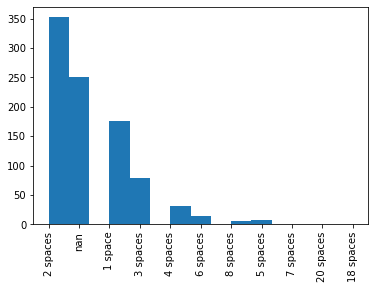

In [73]:
import matplotlib.pyplot as plt
plt.hist(df.Parking, bins=15);
plt.xticks(rotation=90);

In [74]:
mask = df.location== '--\xa0West Jordan'
df.loc[mask, 'location'] = 'West Jordan'

# mask = df_final['lat-lng'].isna()
# df_final.loc[mask, 'lat-lng'] = df_final.loc[mask, 'zip'].apply(get_zip_coordinates)

In [75]:
df.Parking.isna().sum()

250

In [14]:
df.drop(columns=['Lot'], inplace=True)

In [76]:
df['Parking_Binned'] = df.Parking.apply(lambda x: 'Yes' if isinstance(x, str) else 'No')

In [77]:
df

,Type,Year built,Heating,Cooling,Parking,Lot,Total Price,Address,Square Feet,New construction,...,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,HOA,zip,median_nhv,location,Parking_Binned
0,Single Family,2011.0,Other,Central,2 spaces,5227.0,598900.0,"513 W Aspen Peak Dr, South Jordan, UT 84095",3062.0,No,...,3.0,3.0,Home values in 84095 have risen 3.3 % (↑) over...,https://www.zillow.com/homedetails/513-W-Aspen...,0,Yes,84095,520177.0,South Jordan,Yes
1,Single Family,1997.0,"Forced air, Gas",Central,NaN,6534.0,476500.0,"485 E Henry Day Ct, Draper, UT 84020",2873.0,No,...,3.0,0.0,NaN,https://www.zillow.com/homedetails/485-E-Henry...,0,Yes,84020,NaN,Draper,No
2,Townhouse,2000.0,NaN,None,2 spaces,1742.0,814900.0,"250 S Main St #1, Alpine, UT 84004",3248.0,Yes,...,3.0,2.0,NaN,https://www.zillow.com/homedetails/250-S-Main-...,1,Yes,84004,NaN,Alpine,Yes
3,Townhouse,2000.0,NaN,None,2 spaces,1742.0,864900.0,"250 S Main St #25, Alpine, UT 84004",3248.0,Yes,...,3.0,2.0,NaN,https://www.zillow.com/homedetails/250-S-Main-...,1,Yes,84004,NaN,Alpine,Yes
4,Townhouse,2000.0,NaN,None,2 spaces,1742.0,999900.0,"250 S Main St #24, Alpine, UT 84004",4889.0,Yes,...,4.0,3.0,NaN,https://www.zillow.com/homedetails/250-S-Main-...,1,Yes,84004,NaN,Alpine,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,Single Family,2007.0,NaN,None,2 spaces,6534.0,831198.0,"6810 Woods Rose Dr #76, Park City, UT 84098",3213.0,Yes,...,3.0,2.0,NaN,https://www.zillow.com/homedetails/6810-Woods-...,1,Yes,84098,NaN,Park City,Yes
933,Single Family,2007.0,NaN,None,2 spaces,6534.0,749650.0,"6800 Sumac Cir, Park City, UT 84098",3175.0,Yes,...,3.0,2.0,NaN,https://www.zillow.com/homedetails/6800-Sumac-...,1,Yes,84098,NaN,Park City,Yes
934,Single Family,2007.0,NaN,None,2 spaces,6098.0,734750.0,"1397 Sumac Cir, Park City, UT 84098",2953.0,Yes,...,3.0,2.0,NaN,https://www.zillow.com/homedetails/1397-Sumac-...,1,Yes,84098,NaN,Park City,Yes
935,Single Family,1997.0,NaN,None,NaN,10018.0,1365000.0,"1361 W Settlement Dr, Park City, UT 84098",2523.0,No,...,3.0,2.0,NaN,https://www.zillow.com/homedetails/1361-W-Sett...,1,Yes,84098,NaN,Park City,No


In [78]:
df.Type.value_counts()

Single Family            474
Condo                    194
Townhouse                149
Multiple Occupancy        22
Mobile / Manufactured      7
Name: Type, dtype: int64

In [79]:
df.isna().sum()

Type                   72
Year built              0
Heating               472
Cooling                 0
Parking               250
Lot                   414
Total Price             0
Address                 0
Square Feet           176
New construction        0
Bedrooms                1
Bathrooms               0
Full bathrooms          0
neighborhood_stats    415
URL                     0
Half bathrooms          0
HOA                     0
zip                     0
median_nhv            415
location                0
Parking_Binned          0
dtype: int64

In [80]:
# df['Bathrooms_adj'] = abs(df['Bathrooms'] - df['Full bathrooms'])
df['Bedrooms'].fillna(df.Bedrooms.median(), inplace=True)

In [81]:
df_final = df[(df['Type'] != 'Miscellaneous') & (df['Type'] != 'Apartment') & (df.zip != '43147')].copy()

(array([524., 157.,  36.,  17.,   4.,   2.,   1.,   0.,   0.,   1.]),
 array([  250. ,  3009.8,  5769.6,  8529.4, 11289.2, 14049. , 16808.8,
        19568.6, 22328.4, 25088.2, 27848. ]),
 <BarContainer object of 10 artists>)

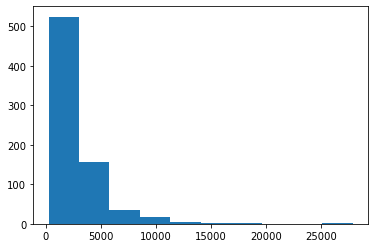

In [82]:
plt.hist(df_final['Square Feet'])

In [83]:
df_final.isna().sum()

Type                   72
Year built              0
Heating               472
Cooling                 0
Parking               250
Lot                   414
Total Price             0
Address                 0
Square Feet           176
New construction        0
Bedrooms                0
Bathrooms               0
Full bathrooms          0
neighborhood_stats    415
URL                     0
Half bathrooms          0
HOA                     0
zip                     0
median_nhv            415
location                0
Parking_Binned          0
dtype: int64

In [23]:
df_final.drop(columns=['Parking'])

,Type,Year built,Heating,Cooling,HOA,Total Price,Address,Square Feet,New construction,Bedrooms,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,zip,median_nhv,Parking_Binned
0,Condo,1910.0,Gas,Central,No,249900.0,"5329 S Harper Ave #2, Chicago, IL 60615",1000.0,No,2.0,2.0,2.0,Home values in Hyde Park have risen 0.6 % (↑) ...,https://www.zillow.com/homedetails/5329-S-Harp...,0,60615,396553,No
1,Single Family,1957.0,Forced air,Central,Yes,399000.0,"7144 N Ozark Ave, Chicago, IL 60631",1224.0,No,2.0,2.0,2.0,Home values in Edison Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/7144-N-Ozar...,0,60631,356353,Yes
2,Condo,2007.0,Forced air,Central,No,169898.0,"1673 W Farwell Ave APT 1S, Chicago, IL 60626",775.0,No,2.0,1.0,1.0,Home values in Rogers Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/1673-W-Farw...,0,60626,226102,No
3,Condo,2008.0,Gas,Central,No,489900.0,"1400 S Michigan Ave APT 2203, Chicago, IL 60605",1273.0,No,2.0,2.0,2.0,Home values in South Loop have risen 0.6 % (↑)...,https://www.zillow.com/homedetails/1400-S-Mich...,0,60605,376901,Yes
4,Single Family,1971.0,Forced air,Central,Yes,389000.0,"10606 S Leavitt St, Chicago, IL 60643",2179.0,No,3.0,3.0,2.0,Home values in Beverly have risen 0.6 % (↑) ov...,https://www.zillow.com/homedetails/10606-S-Lea...,1,60643,346385,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,Condo,2005.0,Forced air,Central,No,168999.0,"9440 S 51st Ave APT 502, Oak Lawn, IL 60453",1052.0,No,1.0,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9440-S-51st...,0,60453,210544,Yes
2606,Single Family,1973.0,Gas,Central,Yes,399900.0,"9246 S Keeler Ave, Oak Lawn, IL 60453",3400.0,No,4.0,3.0,3.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9246-S-Keel...,0,60453,210544,Yes
2607,Condo,1973.0,Other,Refrigeration,No,94500.0,"4929 W 87th St APT 3NW, Oak Lawn, IL 60453",852.0,No,2.0,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/4929-W-87th...,0,60453,210544,Yes
2608,Single Family,1949.0,"Forced air, Gas",Central,Yes,249900.0,"9117 S 53rd Ct, Oak Lawn, IL 60453",1343.0,No,3.0,2.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9117-S-53rd...,1,60453,210544,Yes


In [84]:
df_final.Type.value_counts()

Single Family            474
Condo                    194
Townhouse                149
Multiple Occupancy        22
Mobile / Manufactured      7
Name: Type, dtype: int64

In [85]:
df_final.isna().sum()

Type                   72
Year built              0
Heating               472
Cooling                 0
Parking               250
Lot                   414
Total Price             0
Address                 0
Square Feet           176
New construction        0
Bedrooms                0
Bathrooms               0
Full bathrooms          0
neighborhood_stats    415
URL                     0
Half bathrooms          0
HOA                     0
zip                     0
median_nhv            415
location                0
Parking_Binned          0
dtype: int64

In [26]:
df_final[df_final['zip'] == '43147']

,Type,Year built,Heating,Cooling,Parking,HOA,Total Price,Address,Square Feet,New construction,Bedrooms,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,zip,median_nhv,Parking_Binned


In [86]:
def clean_address(x):
    if 'UNIT' in x:
        temp = x.split(' UNIT')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    elif 'APT' in x:
        temp = x.split(' APT')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    elif '#' in x:
        temp = x.split(' #')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    elif 'PENTHOUSE' in x:
        temp = x.split(' PENTHOUSE')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    elif 'SUITE' in x:
        temp = x.split(' SUITE')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    # just return zip code for weird addresses like these so we can still have gps
    # for these properties
#     elif '(Undisclosed Address)' in x:
#         return x.split(' ')[-1]
#     elif 'Floor plan' in x:
#         return x.split(' ')[-1]
#     elif 'Buildable plan' in x:
#         return x.split(' ')[-1]
    else:
        return x

In [87]:
df_final['address_clean'] = df_final.Address.apply(clean_address)

In [29]:
from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="geopy/2.0.0")
# location = geolocator.geocode("910 west lake street, chicago il, 60607")

def get_coordinates(x):
    geolocator = Nominatim(user_agent="geopy/2.0.0")
    try:
        location_details = geolocator.geocode(x)
        lat_long = location_details[-1]
#        utah -114.052962	36.997968	-109.041058	42.001567
#        illinois -91.513079	36.970298	-87.494756	42.508481
        in_chicago = (36 <= lat_long[0] <= 43) and (-91.5 <= lat_long[1] <= -87)
        if in_chicago:
            print(lat_long)
            return list(lat_long)
        else:
            print(x)
            return np.nan
    except:
        return np.nan

# going to have to remove apartment numbers before you can do get geo location... 
# df_final['lat-lng'] = df_final.address_clean.apply(get_coordinates)


In [30]:
df_final['lat-lng'] = df_final.address_clean.apply(get_coordinates)

(41.798760558651544, -87.58896251138316)
(42.0105906, -87.82028962404709)
(42.00624365, -87.67281299358012)
(41.86377655, -87.62454866743403)
(41.700669500000004, -87.67690644999999)
(41.9053114, -87.62553364357132)
(41.7201647, -87.59263204999999)
(41.8623707, -87.6662151)
(41.915067050000005, -87.7036016427013)
(41.96914686411559, -87.65668639802108)
(41.97169375, -87.77371474874613)
(41.9308798, -87.6401212662577)
(41.9496248, -87.6463764)
(41.9098327, -87.6257175)
(41.8804677, -87.66494085052211)
(42.005519, -87.70856915249365)
(41.94234885, -87.78837995)
(41.991301750000005, -87.65482614125787)
(41.99973835, -87.70053572765963)
(41.741340262336635, -87.73876788528459)
(41.8779241, -87.70503120402208)
(41.9456244, -87.7098029)
(41.89646175, -87.65718906334124)
(41.828017450000004, -87.67057955)
(41.86553025, -87.623088425486)
(41.73526045, -87.71366485080935)
(41.971771000000004, -87.7792153)
(41.7471829, -87.65457951757182)
(41.9604386, -87.6469076)
(41.97865045, -87.6736538513745

(41.790074000000004, -87.6744509029661)
(41.9690863, -87.71284617555963)
(41.98836075, -87.78890208939174)
(41.94436055, -87.64962870340133)
(41.758621500000004, -87.55838221253032)
(41.745172, -87.59713674979062)
(41.9299324, -87.70220050045137)
(41.90541185, -87.6304633)
(41.886889, -87.643705)
(41.7751938, -87.68749545083531)
(41.78418710204082, -87.76552106122449)
(41.9649784, -87.7722883)
(41.6908312, -87.66916124966579)
(41.8397988, -87.70755634149305)
(41.917237681740936, -87.68239913249981)
(41.9292344, -87.65197966019083)
(41.73285265, -87.6028576864324)
400 N La Salle Dr Chicago IL 60654
(41.918462250000005, -87.64273035)
(41.735301500000006, -87.6365944)
(41.74861415, -87.6746349715899)
(41.92659005, -87.68693348540846)
(41.881562, -87.74481285798421)
(42.0087944, -87.66662376856134)
(41.918421499999994, -87.64350711830707)
(41.965055500000005, -87.74171149303547)
(41.87796871720369, -87.62413138982897)
(41.86110145, -87.62689260017937)
(41.996969, -87.709634353603)
(41.8933

(41.7835611, -87.5983000535485)
(41.91843475, -87.71391905)
(41.89779525, -87.76343418192118)
(41.93247, -87.658872)
(41.884885249999996, -87.61478426163526)
(41.86076045, -87.65032172635901)
(41.8909503, -87.76020289854134)
(41.9060012, -87.67455612024449)
(41.96368485, -87.66054761619688)
(41.912380137593765, -87.7023910990906)
(41.950575900000004, -87.69057429022796)
(41.7791697, -87.6104823896875)
(41.8944661, -87.66606994735605)
(41.871913449999994, -87.63326225987674)
(41.95259805, -87.64543977143154)
(41.9122607, -87.6383889135164)
(41.9106332, -87.6677584)
(41.9363735, -87.7938077)
(41.719128299999994, -87.59498321012545)
(41.98027275, -87.65446792760869)
(41.879741100000004, -87.66738800364722)
(41.9923619, -87.6554442)
(41.905898300000004, -87.694903860964)
(41.8861098, -87.61983370118045)
(41.8506491, -87.6206291)
(41.777458476634145, -87.79028678050024)
(41.8933498, -87.6500803)
(41.7862476, -87.6108582)
(41.9029564, -87.6317065835326)
(41.780711249999996, -87.7212289639834

(41.7495034, -87.61093371744187)
(41.90184965, -87.6266902145604)
(41.87367275, -87.68571739870887)
(41.92724683883464, -87.70275170477349)
(41.7136338, -87.6139518)
(41.9733819, -87.667451)
(41.86642115, -87.62997686516064)
(42.0174508, -87.6666915752027)
(41.9115908, -87.7349221)
(42.00425024077593, -87.66823958999495)
(41.80038935, -87.62462706125558)
(41.7431106, -87.6602186)
(41.9514042, -87.80135509735945)
(41.9718261, -87.84067097473523)
(41.9365297, -87.641858)
(41.945596, -87.7292003)
(41.972385349999996, -87.69781600134212)
(41.7582851, -87.57154969701166)
(41.794926849999996, -87.58147866927256)
(41.9871941, -87.7005021)
(41.909343899999996, -87.62973848487842)
(41.96285055, -87.75217220437845)
(41.835762700000004, -87.64886759999999)
(41.8833394, -87.6346345)
(41.9654072, -87.7599340749124)
(41.9542062, -87.76736423993981)
(41.74638585, -87.67273620588387)
(41.9447084, -87.7439297)
(41.9075316, -87.72306486949154)
(42.0616805, -87.7234223)
(42.049486849999994, -87.685358758

(42.0310918, -87.6949823)
(42.0602079, -87.6800522)
(42.0305142, -87.6955257)
(42.049486849999994, -87.68535875817317)
(42.0482058, -87.67630425905067)
(42.0347601, -87.6865832)
(42.0508873, -87.6828375)
(42.0566642, -87.7142963)
(42.0634877, -87.6967958)
(42.0476162, -87.68238795932774)
(42.0508873, -87.6828375)
(42.0647235, -87.7093318)
(42.04025805, -87.68117544346751)
(42.0640467, -87.7041994)
(42.0403569, -87.6839312)
(42.0341235, -87.6795879)
(42.0216057, -87.6838062)
(42.0560695, -87.7108112)
(42.0593791, -87.703887)
(42.03779605243861, -87.70554681916825)
(42.03782805112765, -87.70554599868903)
(42.04060105, -87.68104921323587)
(42.07349246491669, -87.8047167803661)
(42.084737000000004, -87.82070774555109)
(42.06123736160839, -87.8020920703751)
(42.06137688141158, -87.80828012362171)
(42.06090537918282, -87.83851226400249)
(42.0959608132795, -87.79901068610742)
(42.075166564719915, -87.84250627261345)
(42.087874177357314, -87.8238553303398)
(42.06824397824478, -87.8599827450724

(42.082169, -87.79638049041704)
(42.088403, -87.790458)
(42.09703284850891, -87.84216267660727)
(42.07483100201583, -87.80719873738018)
(42.096748833333336, -87.80217916666666)
(42.061852, -87.8223631486677)
(42.096445, -87.860932)
(42.086722, -87.789093)
(42.06590141712225, -87.84698644961404)
(42.1266708, -87.8584474)
(42.0879070206379, -87.82346662498618)
(42.081966048718385, -87.87361998862772)
(42.08017052950672, -87.85032883777978)
(42.07359167416638, -87.77821672775953)
(42.06300361769561, -87.79810836140328)
(42.063247989684406, -87.8322756424948)
(42.056812318189316, -87.82565790267482)
(42.06608551698347, -87.86188155166958)
(42.0729535, -87.8200279)
(42.085539557947996, -87.79390584609968)
(42.07722883411353, -87.79848233405764)
(42.06611523654567, -87.79170732024461)
(42.07243767803872, -87.80720112106444)
(42.0901225, -87.7963009)
(42.079023892204695, -87.80101016866381)
(42.06303891664892, -87.84343538392658)
(42.0987444, -87.8491147)
(42.08424293692721, -87.8420001262448

(41.73617130533734, -88.1184620629702)
(41.728468342493336, -88.19762648605462)
(41.740615142857145, -88.09004857142857)
(41.777192367346935, -88.15384830612246)
(41.764759, -88.158198)
(41.75531042798324, -88.19930672097135)
(41.775206749999995, -88.14076225)
(41.7840799414264, -88.17502560710611)
(41.77107889807197, -88.13904976265118)
(41.750285364872354, -88.17121781761927)
(41.78325908163265, -88.14300855102042)
(41.751077, -88.159394)
(41.768199342611396, -88.15820295444622)
(41.770609592624616, -88.13769994987419)
(41.789932235509134, -88.14358972248071)
(41.745208500000004, -88.1464475)
(42.24407048839087, -88.20015150797667)
(41.750242393939395, -88.19917193939393)
(41.740348272727275, -88.12505836363637)
(41.75154980235264, -88.16737454135647)
(41.73413050633868, -88.10744766075831)
(41.79210557142857, -88.14865342857144)
(41.70536695, -88.1718092904689)
(41.745248, -88.116308)
(41.78519234693878, -88.20212179591836)
(41.728795725880474, -88.13991440000184)
(41.79799985794549

(41.8911231, -87.8030507569323)
(41.88252671084274, -87.8040709513451)
(41.88930699351654, -87.79763242914964)
339 Clinton Ave Oak Park IL 60302
(41.885286, -87.804168)
1139 Highland Ave, Oak Park, IL 60304
(41.886294, -87.80242433333333)
430 Home Ave Oak Park IL 60302
(41.907515216814254, -87.78718516195778)
(41.89666819800595, -87.7963416562709)
(41.894849049155575, -87.7945712144578)
1230 Linden Ave, Oak Park, IL 60302
(41.892786, -87.8024661209505)
(41.876637, -87.803867)
(41.86784113779534, -87.78538051137957)
(41.900132207619194, -87.80382562893325)
(41.8741659372341, -87.79708339218556)
(41.89353612321124, -87.78148305553442)
(41.885765585693555, -87.79432079959982)
(41.893586327179946, -87.78148452878858)
(41.896514, -87.784827)
(41.88198391836735, -87.77699155102042)
(41.87547475649751, -87.78809282761088)
(41.890986749999996, -87.8020975713958)
(41.888449914244184, -87.77807452147603)
(41.881735, -87.787936)
(41.89706763372654, -87.79463036613109)
(41.88595130612245, -87.7749

(42.0489739348632, -87.74582322078106)
(42.007357531443716, -87.75103492470737)
(42.03058358827528, -87.74485438517881)
(42.03445182337594, -87.72905398171575)
(42.02346862778788, -87.74856875615446)
(42.00610903935625, -87.75983916940581)
(42.0195382, -87.7550266)
(42.05984202563637, -87.76098040076172)
(42.0191543, -87.7647225)
(42.06096314677446, -87.7287059981421)
(42.05202873102238, -87.73104929322292)
(42.05963439630623, -87.76099069907416)
(42.033592, -87.73309666666667)
(42.04473902131205, -87.75316076757379)
(42.03092343338896, -87.75583637241756)
(42.00874468498371, -87.76113636797861)
(42.04699978313112, -87.72098557845356)
(42.03099215594767, -87.71851318968163)
(42.037647711367455, -87.71930873652722)
(42.037647711367455, -87.71930873652722)
(42.03221473867419, -87.72692133572976)
(42.04260262012691, -87.75991360516544)
(42.02152164926733, -87.73062632023057)
(42.03359315201887, -87.74090624238262)
(42.0435613280131, -87.7305133478597)
(42.01800074809492, -87.7321500474597

(41.7254307, -87.7279454)
(41.71691187496359, -87.78486903577813)
(41.72685648520268, -87.7217289543829)
(41.72665822347299, -87.78629159322867)
(41.7145578804679, -87.72591662778599)
(41.72533470583542, -87.72419435144135)
(41.7268757274635, -87.78309215752118)
(41.71274936410633, -87.7333616387766)
(41.719353999999996, -87.75177082142858)
(41.7017572, -87.7486602)
(41.73177530289151, -87.7780113553022)
(41.719855, -87.7542434)
(41.719353999999996, -87.75177082142858)
(41.7341457, -87.7602161)
(41.71688597358259, -87.7637818263075)
(41.725924339919516, -87.76654018523656)
(41.71993449144274, -87.74406699984463)
(41.719353999999996, -87.75177082142858)
(41.69463961854648, -87.75156650322039)
(41.7409644, -87.7896776)
(41.70536281479509, -87.72100248899528)
(41.71119922387437, -87.72119528628446)
(41.70499943016832, -87.754781199173)
(41.69231928036949, -87.74958785276259)
(41.694467, -87.741402)
(41.7341457, -87.7602161)
(41.71028154526962, -87.73084953119998)
(41.697834130851426, -87.

In [ ]:
# df_final.to_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/clean_data/all_neighborhoods_clean_lat_long.csv')

# df_final.to_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/clean_data/pc_slc_clean.csv')

# df_final

In [31]:
df_final['lat-lng'].isna().sum()

368

In [32]:
len(df_final.columns.to_list())

21

In [33]:
df_final[df_final['lat-lng'].isna()]

,Type,Year built,Heating,Cooling,Parking,HOA,Total Price,Address,Square Feet,New construction,...,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,zip,median_nhv,Parking_Binned,address_clean,lat-lng
43,Condo,2012.0,Forced air,Central,1 space,No,405000.0,"2103 N Campbell St #GN, Chicago, IL 60612",NaN,No,...,2.0,2.0,Home values in Near West Side have risen 0.6 %...,https://www.zillow.com/homedetails/2103-N-Camp...,0,60612,420759,Yes,2103 N Campbell St Chicago IL 60612,NaN
52,Multi Family,1926.0,Forced air,Central,2 spaces,Yes,469900.0,"3742 N Newland Ave, Chicago, IL 60634",952.0,No,...,3.0,3.0,Home values in Dunning have risen 0.6 % (↑) ov...,https://www.zillow.com/homedetails/3742-N-Newl...,0,60634,264849,Yes,"3742 N Newland Ave, Chicago, IL 60634",NaN
69,Single Family,2005.0,"Forced air, Gas",Central,1 space,Yes,1660000.0,"Buildable plan: Plan C, Parkline Chicago, Chic...",NaN,Yes,...,4.0,3.0,Home values in The Loop have risen 0.6 % (↑) o...,https://www.zillow.com/community/parkline-chic...,1,60601,369141,Yes,"Buildable plan: Plan C, Parkline Chicago, Chic...",NaN
107,Condo,2009.0,Gas,Central,1 space,No,350000.0,"(Undisclosed Address), Chicago, IL 60607",809.0,No,...,1.0,1.0,Home values in The Loop have risen 0.6 % (↑) o...,https://www.zillow.com/homedetails/Chicago-IL-...,0,60607,369141,Yes,"(Undisclosed Address), Chicago, IL 60607",NaN
129,Condo,1975.0,Baseboard,None,1 space,No,119900.0,"2333 N Neva Ave APT 313C, Elmwood Park, IL 60707",650.0,No,...,1.0,1.0,Home values in Galewood have risen 0.6 % (↑) o...,https://www.zillow.com/homedetails/2333-N-Neva...,0,60707,270111,Yes,2333 N Neva Ave Elmwood Park IL 60707,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,Condo,1975.0,"Forced air, Gas",Central,1 space,No,139800.0,"4716 W 106th Pl APT 2C, Oak Lawn, IL 60453",1000.0,No,...,2.0,2.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/4716-W-106t...,0,60453,210544,Yes,4716 W 106th Pl Oak Lawn IL 60453,NaN
2602,Single Family,1955.0,Forced air,Central,2 spaces,Yes,265000.0,"9001 S 49th Ct, Oak Lawn, IL 60453",1300.0,No,...,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9001-S-49th...,0,60453,210544,Yes,"9001 S 49th Ct, Oak Lawn, IL 60453",NaN
2604,Single Family,1966.0,Gas,Central,2 spaces,Yes,297900.0,"10429 S Knox Ave, Oak Lawn, IL 60453",1292.0,No,...,2.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/10429-S-Kno...,1,60453,210544,Yes,"10429 S Knox Ave, Oak Lawn, IL 60453",NaN
2605,Condo,2005.0,Forced air,Central,1 space,No,168999.0,"9440 S 51st Ave APT 502, Oak Lawn, IL 60453",1052.0,No,...,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9440-S-51st...,0,60453,210544,Yes,9440 S 51st Ave Oak Lawn IL 60453,NaN


In [38]:
def get_zip_coordinates(x):
    geolocator = Nominatim(user_agent="geopy/2.0.0")
    try:
        location = geolocator.geocode(x)
        if location != None:
            print(list(location[-1]))
            return list(location[-1])
        else:
            print(x)
            return np.nan
    except:
        return np.nan

In [39]:
# fill na lat-lng values with lat-lng of zip code
mask = df_final['lat-lng'].isna()
df_final.loc[mask, 'lat-lng'] = df_final.loc[mask, 'zip'].apply(get_zip_coordinates)

[41.890555, -87.687272]
[41.943891509558334, -87.79323459610701]
[41.88597326003072, -87.62426231903511]
[41.8883951, -87.652206]
[41.921587813737915, -87.80111102725934]
[41.8883951, -87.652206]
[41.8883951, -87.652206]
[41.8883951, -87.652206]
[41.7978199, -87.5826917]
[41.88597326003072, -87.62426231903511]
[41.88597326003072, -87.62426231903511]
[41.69968359393504, -87.62341086697612]
[41.923732, -87.64271]
[41.9984912, -87.6601622]
[41.8883951, -87.652206]
[41.69968359393504, -87.62341086697612]
[41.89142078489098, -87.63288119348232]
[41.9189107573899, -87.69911509633843]
[41.87853401167714, -87.71772033986943]
[41.7978199, -87.5826917]
[41.98643541859497, -87.70616768688917]
[41.923732, -87.64271]
[41.923732, -87.64271]
[41.8883951, -87.652206]
[41.9610605781569, -87.69870404767025]
[41.88597326003072, -87.62426231903511]
[41.943891509558334, -87.79323459610701]
[41.89142078489098, -87.63288119348232]
[41.697393736159576, -87.69751420151692]
[41.88597326003072, -87.6242623190351

[41.8063783, -88.116084]
[41.6940046, -88.18558305957504]
[41.6940046, -88.18558305957504]
[41.8063783, -88.116084]
[41.6940046, -88.18558305957504]
[49.207429380697235, 2.206539303172687]
[41.8063783, -88.116084]
[41.87314146586051, -87.78710958926249]
[41.898633983554525, -87.7723932119167]
[41.898633983554525, -87.7723932119167]
[41.898633983554525, -87.7723932119167]
[41.87314146586051, -87.78710958926249]
[41.898633983554525, -87.7723932119167]
[41.87314146586051, -87.78710958926249]
[41.898633983554525, -87.7723932119167]
[41.87314146586051, -87.78710958926249]
[41.87314146586051, -87.78710958926249]
[41.898633983554525, -87.7723932119167]
[41.87314146586051, -87.78710958926249]
[41.87314146586051, -87.78710958926249]
[41.898633983554525, -87.7723932119167]
[41.87314146586051, -87.78710958926249]
[41.87314146586051, -87.78710958926249]
[41.898633983554525, -87.7723932119167]
[41.898633983554525, -87.7723932119167]
[41.88819362467146, -87.79962965291593]
[41.898633983554525, -87.7

In [40]:
df_final['lat-lng'].isna().sum()

2

In [41]:
df_temp = df_final['lat-lng'].apply(pd.Series)
df_temp.columns = ['lat', 'long']

complete_df = df_temp.join(df_final)
complete_df.drop(columns=['lat-lng'], inplace=True)

In [42]:
complete_df

,lat,long,Type,Year built,Heating,Cooling,Parking,HOA,Total Price,Address,...,Bedrooms,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,zip,median_nhv,Parking_Binned,address_clean
0,41.798761,-87.588963,Condo,1910.0,Gas,Central,NaN,No,249900.0,"5329 S Harper Ave #2, Chicago, IL 60615",...,2.0,2.0,2.0,Home values in Hyde Park have risen 0.6 % (↑) ...,https://www.zillow.com/homedetails/5329-S-Harp...,0,60615,396553,No,5329 S Harper Ave Chicago IL 60615
1,42.010591,-87.820290,Single Family,1957.0,Forced air,Central,2 spaces,Yes,399000.0,"7144 N Ozark Ave, Chicago, IL 60631",...,2.0,2.0,2.0,Home values in Edison Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/7144-N-Ozar...,0,60631,356353,Yes,"7144 N Ozark Ave, Chicago, IL 60631"
2,42.006244,-87.672813,Condo,2007.0,Forced air,Central,NaN,No,169898.0,"1673 W Farwell Ave APT 1S, Chicago, IL 60626",...,2.0,1.0,1.0,Home values in Rogers Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/1673-W-Farw...,0,60626,226102,No,1673 W Farwell Ave Chicago IL 60626
3,41.863777,-87.624549,Condo,2008.0,Gas,Central,2 spaces,No,489900.0,"1400 S Michigan Ave APT 2203, Chicago, IL 60605",...,2.0,2.0,2.0,Home values in South Loop have risen 0.6 % (↑)...,https://www.zillow.com/homedetails/1400-S-Mich...,0,60605,376901,Yes,1400 S Michigan Ave Chicago IL 60605
4,41.700670,-87.676906,Single Family,1971.0,Forced air,Central,4 spaces,Yes,389000.0,"10606 S Leavitt St, Chicago, IL 60643",...,3.0,3.0,2.0,Home values in Beverly have risen 0.6 % (↑) ov...,https://www.zillow.com/homedetails/10606-S-Lea...,1,60643,346385,Yes,"10606 S Leavitt St, Chicago, IL 60643"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,41.714684,-87.754065,Condo,2005.0,Forced air,Central,1 space,No,168999.0,"9440 S 51st Ave APT 502, Oak Lawn, IL 60453",...,1.0,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9440-S-51st...,0,60453,210544,Yes,9440 S 51st Ave Oak Lawn IL 60453
2606,41.725069,-87.726728,Single Family,1973.0,Gas,Central,2 spaces,Yes,399900.0,"9246 S Keeler Ave, Oak Lawn, IL 60453",...,4.0,3.0,3.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9246-S-Keel...,0,60453,210544,Yes,"9246 S Keeler Ave, Oak Lawn, IL 60453"
2607,41.734146,-87.760216,Condo,1973.0,Other,Refrigeration,1 space,No,94500.0,"4929 W 87th St APT 3NW, Oak Lawn, IL 60453",...,2.0,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/4929-W-87th...,0,60453,210544,Yes,4929 W 87th St Oak Lawn IL 60453
2608,41.714684,-87.754065,Single Family,1949.0,"Forced air, Gas",Central,2 spaces,Yes,249900.0,"9117 S 53rd Ct, Oak Lawn, IL 60453",...,3.0,2.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9117-S-53rd...,1,60453,210544,Yes,"9117 S 53rd Ct, Oak Lawn, IL 60453"


In [43]:
complete_df.to_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/clean_data/all_neighborhoods_clean.csv')



In [44]:
complete_df

,lat,long,Type,Year built,Heating,Cooling,Parking,HOA,Total Price,Address,...,Bedrooms,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,zip,median_nhv,Parking_Binned,address_clean
0,41.798761,-87.588963,Condo,1910.0,Gas,Central,NaN,No,249900.0,"5329 S Harper Ave #2, Chicago, IL 60615",...,2.0,2.0,2.0,Home values in Hyde Park have risen 0.6 % (↑) ...,https://www.zillow.com/homedetails/5329-S-Harp...,0,60615,396553,No,5329 S Harper Ave Chicago IL 60615
1,42.010591,-87.820290,Single Family,1957.0,Forced air,Central,2 spaces,Yes,399000.0,"7144 N Ozark Ave, Chicago, IL 60631",...,2.0,2.0,2.0,Home values in Edison Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/7144-N-Ozar...,0,60631,356353,Yes,"7144 N Ozark Ave, Chicago, IL 60631"
2,42.006244,-87.672813,Condo,2007.0,Forced air,Central,NaN,No,169898.0,"1673 W Farwell Ave APT 1S, Chicago, IL 60626",...,2.0,1.0,1.0,Home values in Rogers Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/1673-W-Farw...,0,60626,226102,No,1673 W Farwell Ave Chicago IL 60626
3,41.863777,-87.624549,Condo,2008.0,Gas,Central,2 spaces,No,489900.0,"1400 S Michigan Ave APT 2203, Chicago, IL 60605",...,2.0,2.0,2.0,Home values in South Loop have risen 0.6 % (↑)...,https://www.zillow.com/homedetails/1400-S-Mich...,0,60605,376901,Yes,1400 S Michigan Ave Chicago IL 60605
4,41.700670,-87.676906,Single Family,1971.0,Forced air,Central,4 spaces,Yes,389000.0,"10606 S Leavitt St, Chicago, IL 60643",...,3.0,3.0,2.0,Home values in Beverly have risen 0.6 % (↑) ov...,https://www.zillow.com/homedetails/10606-S-Lea...,1,60643,346385,Yes,"10606 S Leavitt St, Chicago, IL 60643"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,41.714684,-87.754065,Condo,2005.0,Forced air,Central,1 space,No,168999.0,"9440 S 51st Ave APT 502, Oak Lawn, IL 60453",...,1.0,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9440-S-51st...,0,60453,210544,Yes,9440 S 51st Ave Oak Lawn IL 60453
2606,41.725069,-87.726728,Single Family,1973.0,Gas,Central,2 spaces,Yes,399900.0,"9246 S Keeler Ave, Oak Lawn, IL 60453",...,4.0,3.0,3.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9246-S-Keel...,0,60453,210544,Yes,"9246 S Keeler Ave, Oak Lawn, IL 60453"
2607,41.734146,-87.760216,Condo,1973.0,Other,Refrigeration,1 space,No,94500.0,"4929 W 87th St APT 3NW, Oak Lawn, IL 60453",...,2.0,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/4929-W-87th...,0,60453,210544,Yes,4929 W 87th St Oak Lawn IL 60453
2608,41.714684,-87.754065,Single Family,1949.0,"Forced air, Gas",Central,2 spaces,Yes,249900.0,"9117 S 53rd Ct, Oak Lawn, IL 60453",...,3.0,2.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9117-S-53rd...,1,60453,210544,Yes,"9117 S 53rd Ct, Oak Lawn, IL 60453"


In [ ]:
# get_zip_coordinates('84098')